## PCC103 Métodos Científicos - Exercício Intervalos de Confiança #02
Aluno: Marco Aurélio Moura Suriani

In [1]:
# Bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, special

## 1) PDF da Distribuição t-Student

* Função: `my_t_distribution_pdf`
* Testada com v = 2 e v = 30
* Comparada com: CDF do scipy (`scipy.stats.t.pdf`)

In [2]:
def my_t_distribution_pdf(x, v):    
    return pow(1 + (x**2/v), (v+1)/(-2)) * special.gamma((v+1)/2) / (np.sqrt(np.pi * v) * special.gamma(v/2) )

In [3]:
x = np.linspace(-7.5, 7.5, 1000)

y1 = my_t_distribution_pdf(x, 2)
y2 = my_t_distribution_pdf(x, 30)

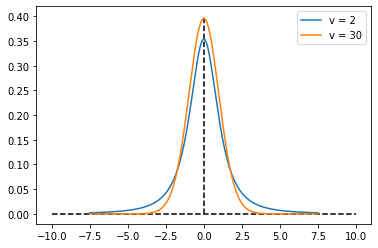

In [4]:
plt.plot([0, 0], [0, 0.4], 'k--')
plt.plot([-10, 10], [0, 0], 'k--')
plt.plot(x, y1, label = "v = 2")
plt.plot(x, y2, label = "v = 30")
plt.legend()
plt.show()

In [5]:
# Comparação com scipy
ys = stats.t.pdf(x, df=2)

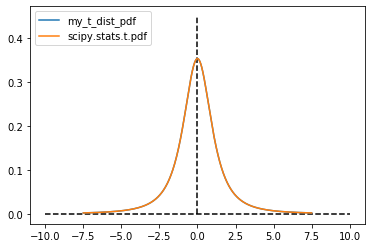

In [6]:
plt.plot([0, 0], [0, 0.45], 'k--')
plt.plot([-10, 10], [0, 0], 'k--')
plt.plot(x, y1, label='my_t_dist_pdf')
plt.plot(x, ys, label='scipy.stats.t.pdf')
plt.legend(loc=2)
plt.show()

## 2) CDF da Distribuição t-Student

* Função: `my_t_distribution_cdf`
* Testada com v = 2 e v = 30
* Comparada com: CDF do scipy (`scipy.stats.t.cdf`)

In [7]:
def my_t_distribution_cdf(x, v): 
    aux = special.hyp2f1(0.5, (v+1)/2, 1.5, x**2/(-v)) / (np.sqrt(np.pi * v) * special.gamma(v/2) )
    return 0.5 + x*special.gamma((v+1)/2) * aux

In [8]:
x = np.linspace(-7.5, 7.5, 1000)

y1 = my_t_distribution_cdf(x, 2)
y2 = my_t_distribution_cdf(x, 30)

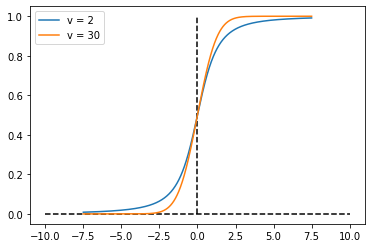

In [9]:
plt.plot([0, 0], [0, 1], 'k--')
plt.plot([-10, 10], [0, 0], 'k--')
plt.plot(x, y1, label = "v = 2")
plt.plot(x, y2, label = "v = 30")
plt.legend()
plt.show()

In [10]:
# Comparação com scipy
ys = stats.t.cdf(x, df=2)

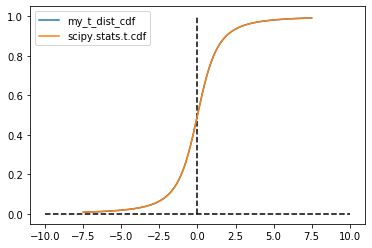

In [11]:
plt.plot([0, 0], [0, 1], 'k--')
plt.plot([-10, 10], [0, 0], 'k--')
plt.plot(x, y1, label='my_t_dist_cdf')
plt.plot(x, ys, label='scipy.stats.t.cdf')
plt.legend(loc=2)
plt.show()

## 3) CDF da Distribuição t-Student - Intervalo

* Função: `my_t_distribution_cdf2`
* Testada com v = 2 e v = 30

In [12]:
def my_t_distribution_cdf2(x1, x2, v): 
    return my_t_distribution_cdf(x2, v) - my_t_distribution_cdf(x1, v)

In [13]:
# Testando para intervalos
print('Para v =  2 : p([-1, 1]) = %.5f ' % my_t_distribution_cdf2(-1, 1,  2))
print('Para v =  2 : p([ 0, 1]) = %.5f ' % my_t_distribution_cdf2( 0, 1,  2))
print('Para v = 30 : p([ 0, 1]) = %.5f ' % my_t_distribution_cdf2( 0, 1, 30))

Para v =  2 : p([-1, 1]) = 0.57735 
Para v =  2 : p([ 0, 1]) = 0.28868 
Para v = 30 : p([ 0, 1]) = 0.33735 
